In [219]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
#import data
PATH = 'C:/Users/admin/Desktop/python/COVID_in_India/data/covid19-india-statewise-timeseries.csv'
df = pd.read_csv(PATH)

In [221]:
#show example data
df.head(10)

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,NaN,NaN
1,02-02-2020,Kerala,2,NaN,NaN
2,03-02-2020,Kerala,3,NaN,NaN
3,02-03-2020,Kerala,3,NaN,NaN
4,02-03-2020,Delhi,1,NaN,NaN
5,02-03-2020,Telangana,1,NaN,NaN
6,03-03-2020,Kerala,3,NaN,NaN
7,03-03-2020,Delhi,1,NaN,NaN
8,03-03-2020,Telangana,1,NaN,NaN
9,03-03-2020,Rajasthan,1,NaN,NaN


In [222]:
#replacing Nan with 0
df = df.fillna(0)

#converting strings in Date to datetime format 
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.head(10)

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,2020-01-30,Kerala,1,0.0,0.0
1,2020-02-02,Kerala,2,0.0,0.0
2,2020-02-03,Kerala,3,0.0,0.0
3,2020-03-02,Kerala,3,0.0,0.0
4,2020-03-02,Delhi,1,0.0,0.0
5,2020-03-02,Telangana,1,0.0,0.0
6,2020-03-03,Kerala,3,0.0,0.0
7,2020-03-03,Delhi,1,0.0,0.0
8,2020-03-03,Telangana,1,0.0,0.0
9,2020-03-03,Rajasthan,1,0.0,0.0


In [223]:
#display the states of India
state_col = df.State
states = list(state_col.value_counts().keys())

print('States: {}'.format(states))
print('Number of states: {}'.format(len(states)))

States: ['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Tamil Nadu', 'Ladakh', 'Bihar', 'Andhra Pradesh', 'Jammu and Kashmir', 'Punjab', 'Maharashtra', 'Karnataka', 'Chhattisgarh', 'Uttarakhand', 'Odisha', 'Puducherry', 'Gujarat', 'Chandigarh', 'West Bengal', 'Madhya Pradesh', 'Himachal Pradesh', 'Manipur', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand', 'Assam', 'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim']
Number of states: 35


In [224]:
#check the range of dates
first_day = df.Date[0]
print('1st day: {}'.format(first_day))

last_index = len(df.Date) - 1 
last_day = df.Date[last_index]
print('last day: {}'.format(last_day))

unique_days = set(df.Date)
print('Number of unique days: {}'.format(len(unique_days)))

1st day: 2020-01-30 00:00:00
last day: 2020-08-16 00:00:00
Number of unique days: 171


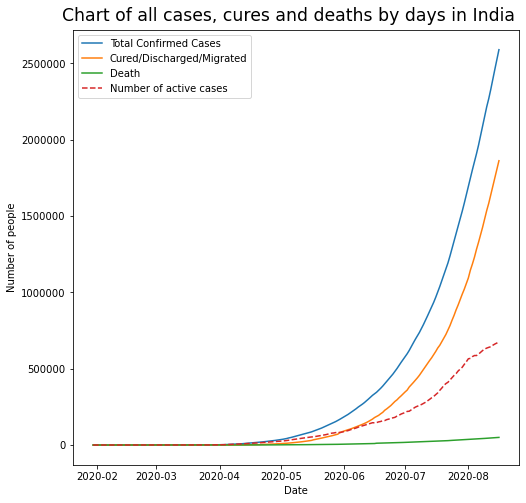

In [263]:
###plot chart of all cases, cures and deaths by days
import matplotlib.dates as mdates

#gathering cumulative data
conf_cases = {}
cured = {}
dead = {}
column_names = list(df.columns[2:])

for day in unique_days:
    day_properties = df[df.Date == day]
    conf_cases[day] = sum(day_properties[column_names[0]])
    cured[day] = sum(day_properties[column_names[1]])
    dead[day] = sum(day_properties[column_names[2]])
    
data_to_plot = [conf_cases, cured, dead]

def create_cumulative_df(data_list):
    output = []
    for i, data in enumerate(data_to_plot):
        dates = list(data.keys())
        data_df = pd.DataFrame.from_dict({
            'Date' : dates, 
            'Num' : [data[date] for date in dates]})
        data_df.sort_values(by='Date',inplace=True)
        output.append(data_df)
    return output

[conf_cases, cured, dead] = create_cumulative_df(data_to_plot)

#count active cases
num_of_act_cases = conf_cases.Num - (cured.Num + dead.Num)

#plotting data
fig = plt.figure(figsize=(8,8))
plt.suptitle('Chart of all cases, cures and deaths by days in India', y=0.92, size='xx-large')

for i, data_df in enumerate([conf_cases, cured, dead]):
    plt.plot(data_df.Date, data_df.Num, label=column_names[i])

plt.plot(conf_cases.Date, num_of_act_cases, label='Number of active cases', linestyle="--")
plt.xlabel('Date')
plt.ylabel('Number of people')
fig.axes[0].yaxis.get_major_formatter().set_scientific(False)  #turn off scientific notation
plt.legend()
plt.show()